Simple Linear Regression
-----

**Question 1**  

The scatterplots below show the relationship between height, diameter, and volume of timber in 31 felled black cherry trees. The diameter of the tree is measured 4.5 feet above the ground.  

<img src="images/lab6_1_q4.png" width="600">  

(a) Describe the relationship between volume and height of these trees.  

    semi linear and the volume seems to cap height

(b) Describe the relationship between volume and diameter of these trees.  

    linear relationship between volume and diameter

(c) Suppose you have height and diameter measurements for another black cherry tree. Which of these variables would be preferable to use to predict the volume of timber in this tree using a simple linear regression model? Explain your reasoning.

    i would pick the diameter because there is a higher relationship between diameter and volume than for height 
    and volume

**Question 2**  

In `utils.csv` are the average utility bills for homes of a particular size and the average monthly temperature.  

Load the data:

In [42]:
import pandas as pd

In [43]:
df = pd.read_csv('data/utils.csv')
df.head()

,Month,Average Bill,Average Monthly Temperature
0,Jan,148.5,38
1,Feb,136.5,45
2,Mar,117.0,49
3,Apr,91.5,57
4,May,82.5,69


Make a scatter plot of the data bill by tempeture. Which variable would make the most sense as the response variable?

In [44]:
import seaborn as sns
sns.set()

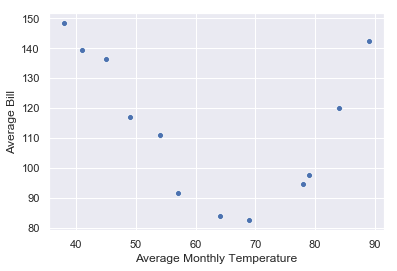

In [45]:
sns.scatterplot(y='Average Bill', x='Average Monthly Temperature', data=df);

From visual inspection, what is the relationship between the variables?

    seems like a polynominal degree 2 relationship

Fit a simple linear regression using OLS.  

In [46]:
import statsmodels.api as sms

In [74]:
X = df[['Average Monthly Temperature']]
y = df[['Average Bill']]
X = sms.add_constant(X)
X['Squared'] = [z ** 2 for z in df['Average Monthly Temperature']]
X.head()

,const,Average Monthly Temperature,Squared
0,1.0,38,1444
1,1.0,45,2025
2,1.0,49,2401
3,1.0,57,3249
4,1.0,69,4761


In [75]:
model = sms.OLS(y, X)
results = model.fit()
results.summary()

/Users/flori/anaconda3/envs/nf/lib/python3.6/site-packages/scipy/stats/stats.py:1394: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=12
  "anyway, n=%i" % int(n))


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:           Average Bill   R-squared:                       0.920
Model:                            OLS   Adj. R-squared:                  0.902
Method:                 Least Squares   F-statistic:                     51.66
Date:                Mon, 28 Oct 2019   Prob (F-statistic):           1.17e-05
Time:                        13:57:52   Log-Likelihood:                -39.428
No. Observations:                  12   AIC:                             84.86
Df Residuals:                       9   BIC:                             86.31
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
===============================================================================================
                                  coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------------
const                         484.1076     36.956     13.099      0.000     400.507     567.708
Average Monthly Temperature   -12.0760      1.233     -9.792      0.000     -14.866      -9.286
Squared                         0.0918      0.010      9.454      0.000       0.070       0.114
==============================================================================
Omnibus:                        1.589   Durbin-Watson:                   2.241
Prob(Omnibus):                  0.452   Jarque-Bera (JB):                1.042
Skew:                           0.453   Prob(JB):                        0.594
Kurtosis:                       1.876   Cond. No.                     8.01e+04
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 8.01e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

Calculate and interpret the value of $R^2$.  

    R squared is 0.92 what is actually a quite good value 

Interpret the intercept and slope coefficients in terms a home owner would understand.

    Intercept 484.1076 should be the average bill

What is the 97.5% confidence interval for the intercept?  

            567.708

Is the average monthly temperature a significant predictor of the average utility bill? Why or why not?  

    It is a significant predictor because R-squared is 0.92. 
    In the plot we can see the same and it makes sense, that the houseowners use their heater when it is
    cold. Than there is the comfort outside temperature so the houseowners do nothing and the bill is quite low. 
    If it is getting to hot outside the homeowners are using thier AC and the bill goes up again.

Use the least squares line to estimate the average utility bill if the average monthly temperature is 120 degrees. Do you think that your answer is reasonable? Why or why not? 

<br>

<details><summary>
Click here for a hint…
</summary>
model.predict(…)  
http://statsmodels.sourceforge.net/0.6.0/examples/notebooks/generated/predict.html
</details>

In [81]:
prediction = results.predict((1,120, 120 **2))
prediction

array([356.32080277])

In [77]:
import numpy as np

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


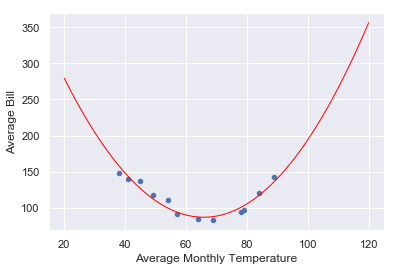

In [78]:
intercept, slope, square = results.params
ax = df.plot('Average Monthly Temperature','Average Bill', kind='scatter')
xx = np.linspace(20, 120, 60)
ax.plot(xx,(xx**2)*square+  xx*slope + intercept, color='red', lw=1);

    As we can see in the plot the bill should be higher than 140 for an average temperature of 120 so the 
    prediction makes sense.

<br>
<br> 
<br>

----